In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Phebus_chauffage_allege_avec_new_R_new_S.xlsx")
df.head()

,ident2,Pondmen,Type logement,terre plein et vide sanitaire,position de l'appartement,QType logement,Période de construction Phébus (6 classes),Code postal,Dép_FB,Surface habitable (m²),...,Rd chauffage énergie tertiaire,Rr chauffage énergie tertiaire,Rg chauffage énergie tertiaire,Rendement total chauffage énergie tertiaire,Rendement total,Cch énergie principale (ef) DPE,Cch énergie secondaire (ef) DPE,Cch énergie tertiaire (ef) DPE,Cch totale (kWhef) DPE,Cch totale kWhef/m²
0,8,11866.787738,Maison Individuelle,Terre plein,NaN,1,Avant 1919,24560,24,220.00,...,NaN,NaN,NaN,NaN,0.781610,16376.603282,10450.859267,0.0,26827.462549,121.943012
1,11,4711.342201,Maison Individuelle,Vide sanitaire,NaN,1,Avant 1919,82110,82,200.00,...,NaN,NaN,NaN,NaN,0.671231,36427.745468,13805.655577,0.0,50233.401045,251.167005
2,13,8030.076015,Logement,logt non concerné,étage int.,2,De 1946 à 1970,29200,29,89.90,...,NaN,NaN,NaN,NaN,0.678152,10012.872406,0.000000,0.0,10012.872406,111.377891
3,14,10327.834379,Maison Individuelle,Terre plein,NaN,1,De 1971 à 1990,86100,86,260.00,...,NaN,NaN,NaN,NaN,0.940500,19207.825957,0.000000,0.0,19207.825957,73.876254
4,16,10449.245764,Maison Individuelle,Vide sanitaire,NaN,1,De 1971 à 1990,18000,18,81.81,...,NaN,NaN,NaN,NaN,0.766937,14137.828939,0.000000,0.0,14137.828939,172.812968


In [3]:
data = pd.read_csv("batiment_groupe_dpe_representatif_logement.csv")
data.head()

,batiment_groupe_id,identifiant_dpe,code_departement_insee,arrete_2021,type_dpe,type_batiment_dpe,periode_construction_dpe,annee_construction_dpe,version,date_etablissement_dpe,...,type_porte,surface_porte,u_porte,classe_inertie,deperdition_mur,deperdition_baie_vitree,deperdition_plancher_bas,deperdition_plancher_haut,deperdition_pont_thermique,deperdition_porte
0,75114000AN0113_2e395dd3c45f67d,2275E1394673F,75,1,dpe arrêté 2021 3cl logement,appartement,avant 1948,NaN,2.1,2022/06/22 00:00:00,...,porte simple en bois porte opaque pleine,2.99,3.5,Légère,13.170184,37.476,0.0,0.0,NaN,0.52325
1,75108000CK0036_b4b447c450ad59b,1975L1000713R,75,0,dpe arrêté 2012 facture logement,appartement,avant 1948,1947.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106000AX0072_8f312a91b4c6c1f,1775L2008539E,75,0,dpe arrêté 2012 facture logement,appartement,avant 1948,1900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75120000AE0076_0f572212c6d8bef,2075V2003590R,75,0,dpe arrêté 2012 facture logement,appartement,avant 1948,1947.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75109000AN0029_840cff531a4e339,1775L2006273X,75,0,dpe arrêté 2012 facture logement,appartement,avant 1948,1900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = data[["annee_construction_dpe", "epaisseur_lame", "vitrage_vir","surface_vitree_nord",
           "surface_vitree_sud",
           "surface_vitree_ouest","surface_vitree_est",

           "surface_habitable_logement","type_vitrage",	"type_materiaux_menuiserie",
           "type_gaz_lame","type_fermeture","u_baie_vitree","uw","facteur_solaire_baie_vitree",
           "presence_balcon","l_orientation_baie_vitree"


]]

df_to_complete = df[df["u_baie_vitree"].isna()]
print(df.shape)
df = df.replace('NaN', np.nan)
df = df.drop("uw", axis=1)
U = df["u_baie_vitree"]

df = df.drop(["u_baie_vitree","facteur_solaire_baie_vitree", "l_orientation_baie_vitree"], axis=1)



print(df.shape)
df.head(2)

(49489, 17)
(49489, 13)


,annee_construction_dpe,epaisseur_lame,vitrage_vir,surface_vitree_nord,surface_vitree_sud,surface_vitree_ouest,surface_vitree_est,surface_habitable_logement,type_vitrage,type_materiaux_menuiserie,type_gaz_lame,type_fermeture,presence_balcon
0,NaN,NaN,NaN,6.94,NaN,NaN,NaN,23.54,simple vitrage,bois,NaN,abscence de fermeture pour la baie vitrée,0.0
1,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,double vitrage,bois,air sec,NaN,NaN


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

numeric_data = df[numeric_cols]
categorical_data = df[categorical_cols]

num_imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = num_imputer.fit_transform(numeric_data)

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = cat_imputer.fit_transform(categorical_data)

numeric_data_imputed = pd.DataFrame(numeric_data_imputed, columns=numeric_cols)
categorical_data_imputed = pd.DataFrame(categorical_data_imputed, columns=categorical_cols)

# Combine numeric and categorical data back into one DataFrame
df_imputed = pd.concat([numeric_data_imputed, categorical_data_imputed], axis=1)
df_imputed["u_baie_vitree"] = U



In [7]:

df_encoded = pd.get_dummies(df_imputed, columns=categorical_cols)
df_to_complete = df_encoded[df_encoded["u_baie_vitree"].isna()]
df_encoded.dropna(subset=["u_baie_vitree"], inplace=True)

X = df_encoded.drop("u_baie_vitree",axis=1)
y = df_encoded["u_baie_vitree"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

# Create and train the model
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(r2_score(y_test, predictions))

Mean Absolute Error (MAE): 0.21766184890848383
Mean Squared Error (MSE): 0.13300400082607258
Root Mean Squared Error (RMSE): 0.36469713575249335
0.8849334816698093


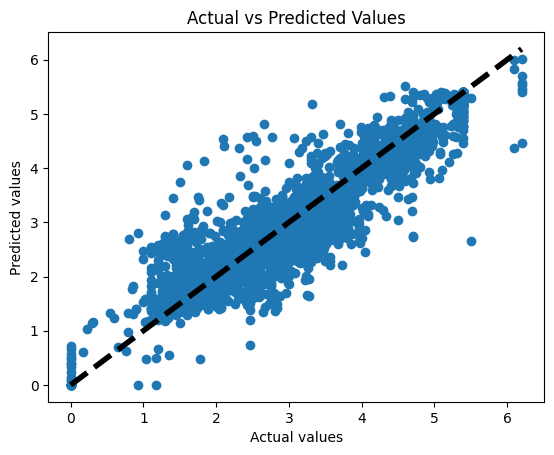

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.show()

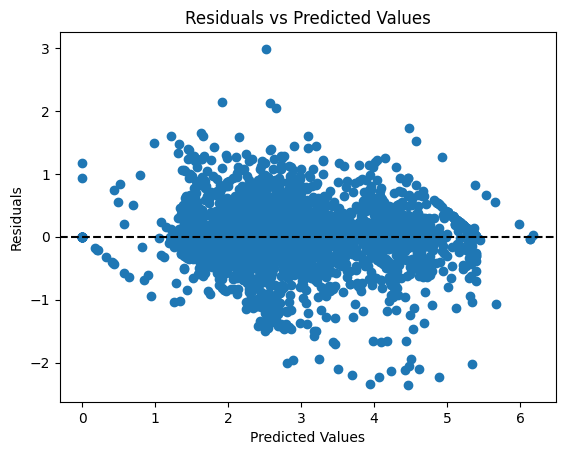

In [55]:
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [56]:
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df[0:10])

                                              Feature  Importance
11                        type_vitrage_simple vitrage    0.485556
2                                         vitrage_vir    0.145844
32  type_fermeture_abscence de fermeture pour la b...    0.116038
19  type_materiaux_menuiserie_métal sans rupture d...    0.052460
21                      type_materiaux_menuiserie_pvc    0.030521
1                                      epaisseur_lame    0.029212
7                          surface_habitable_logement    0.024356
5                                surface_vitree_ouest    0.021615
6                                  surface_vitree_est    0.021271
4                                  surface_vitree_sud    0.020418


In [57]:
df_to_complete.head()

,annee_construction_dpe,epaisseur_lame,vitrage_vir,surface_vitree_nord,surface_vitree_sud,surface_vitree_ouest,surface_vitree_est,surface_habitable_logement,presence_balcon,type_vitrage,type_materiaux_menuiserie,type_gaz_lame,type_fermeture,u_baie_vitree
1,1947.0,13.820352,0.236233,8.86995,9.124861,7.601745,7.670606,52.388285,0.041421,double vitrage,bois,air sec,abscence de fermeture pour la baie vitrée,NaN
2,1900.0,13.820352,0.236233,8.86995,9.124861,7.601745,7.670606,52.388285,0.041421,double vitrage,bois,air sec,abscence de fermeture pour la baie vitrée,NaN
3,1947.0,13.820352,0.236233,8.86995,9.124861,7.601745,7.670606,52.388285,0.041421,double vitrage,pvc,air sec,abscence de fermeture pour la baie vitrée,NaN
4,1900.0,13.820352,0.236233,8.86995,9.124861,7.601745,7.670606,52.388285,0.041421,double vitrage,pvc,air sec,abscence de fermeture pour la baie vitrée,NaN
5,1948.0,13.820352,0.236233,8.86995,9.124861,7.601745,7.670606,52.388285,0.041421,double vitrage,bois,air sec,abscence de fermeture pour la baie vitrée,NaN


In [64]:

predictions2 = rf.predict(df_to_complete.drop("u_baie_vitree", axis=1))

In [71]:
df_completed = data[data["u_baie_vitree"].isna()]
df_completed["u_baie_vitree"] = predictions2

C:\Users\artem\AppData\Local\Temp\ipykernel_21868\1876175911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed["u_baie_vitree"] = predictions2


In [92]:
df_combined = pd.concat([df_completed, data.dropna(subset=["u_baie_vitree"])], axis=0).sort_index()

In [84]:
df_combined.shape

(49489, 106)

In [93]:
df_combined.to_csv('output4.csv', index=False)

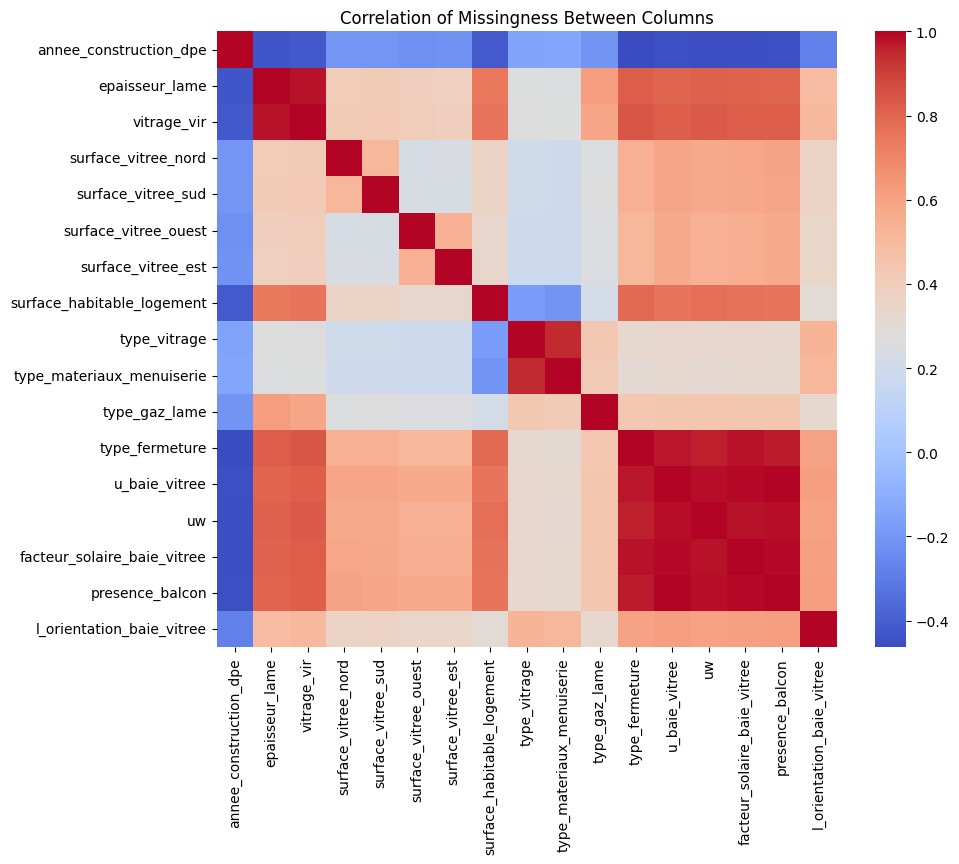

In [98]:
df2 = data[["annee_construction_dpe", "epaisseur_lame", "vitrage_vir","surface_vitree_nord",
           "surface_vitree_sud",
           "surface_vitree_ouest","surface_vitree_est",

           "surface_habitable_logement","type_vitrage",	"type_materiaux_menuiserie",
           "type_gaz_lame","type_fermeture","u_baie_vitree","uw","facteur_solaire_baie_vitree",
           "presence_balcon","l_orientation_baie_vitree"


]]

# Assuming df is your original DataFrame
missing_indicators = df2.isna()
# This gives you the correlation of the missingness between every pair of columns
correlation_of_missing = missing_indicators.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation_of_missing, annot=False, cmap='coolwarm')
plt.title("Correlation of Missingness Between Columns")
plt.show()
